# PyTorch Basic structure

<hr>

### Table of content
1. Basic autograd

2. Loading data from numpy 

3. Input pipeline           

4. Input pipeline for custom dataset 

5. Pretrained model                 

6. Save and load model

7. Train a simple MNIST Neural nets

</br>
In this tutorial, we are going to advance one step further, looking at implementing basic pytorch structure such as initialising of dataset. This will be useful in future when we are building more complex networks

In [1]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import pandas as pd
from skimage import io, transform
import os
from torch.utils.data import Dataset, DataLoader

## 2.1 Basic autograd 

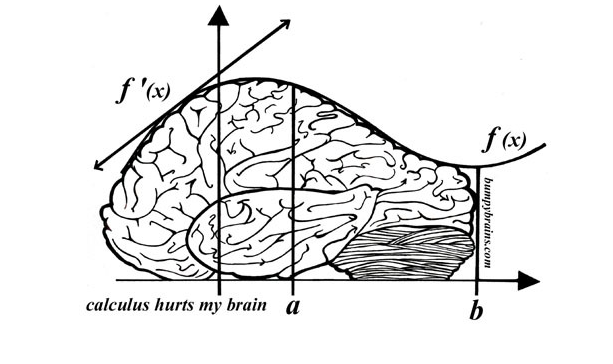
### Source: [Bumpybrains](http://bumpybrains.com/comics.php?comic=34)

Let’s just agree, we are all bad at calculus when it comes to large neural networks. It is impractical to calculate gradients of such large composite functions by explicitly solving mathematical equations especially because these curves exist in a large number of dimensions and are impossible to fathom.This is where PyTorch’s autograd comes in. It abstracts the complicated mathematics and helps us “magically” calculate gradients of high dimensional curves with only a few lines of code. This post attempts to describe the magic of autograd.

<b> Autograd: </b>This class is an engine to calculate derivatives (Jacobian-vector product to be more precise). It records a graph of all the operations performed on a gradient enabled tensor and creates an acyclic graph called the dynamic computational graph. The leaves of this graph are input tensors and the roots are output tensors. Gradients are calculated by tracing the graph from the root to the leaf and multiplying every gradient in the way using the chain rule.

<b> Data: </b>It’s the data a variable is holding.

<b> requires_grad: </b>This member, if true starts tracking all the operation history and forms a backward graph for gradient calculation. For an arbitrary tensor a It can be manipulated in-place as follows: a.requires_grad_(True).

<b> grad: </b>grad holds the value of gradient. If requires_grad is False it will hold a None value. Even if requires_grad is True, it will hold a None value unless .backward() function is called from some other node. For example, if you call out.backward() for some variable out that involved x in its calculations then x.grad will hold ∂out/∂x.

<b> grad_fn: </b>This is the backward function used to calculate the gradient.

<b>is_leaf:</b> A node is leaf if :
1. It was initialized explicitly by some function like x = torch.tensor(1.0) or x = torch.randn(1, 1) (basically all the tensor initializing methods discussed at the beginning of this post).
2. It is created after operations on tensors which all have requires_grad = False.
3. It is created by calling .detach() method on some tensor.

In [2]:
# Create tensors.
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


In [3]:
#displaying

for i, name in zip([x, w, b], "xwb"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n\
grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

x
data: 1.0
requires_grad: True
grad: 2.0
grad_fn: None
is_leaf: True

w
data: 2.0
requires_grad: True
grad: 1.0
grad_fn: None
is_leaf: True

b
data: 3.0
requires_grad: True
grad: 1.0
grad_fn: None
is_leaf: True



In [4]:
# Example for a linear model

# create sample dataset
x = torch.randn(10, 3)  # 10 row of 3 features input
y = torch.randn(10, 2)  # 10 row of 2 features output

Applies a linear transformation to the incoming data:
$ y = xA^{T} + B $
<hr>

Parameters

<b>in_features: </b> size of each input sample

<b>out_features: </b> size of each output sample

<b>bias: </b> If set to False, the layer will not learn an additive bias. Default: True

#### Learn more from documentation [PyTorch Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)


In [5]:
# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print()
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.4586,  0.2699,  0.0802],
        [-0.1583,  0.2248, -0.4854]], requires_grad=True)

b:  Parameter containing:
tensor([-0.0365, -0.3961], requires_grad=True)


#### Optimizer - stochastic gradient descent

<hr>

Parameters

<b> params (iterable) :</b> iterable of parameters to optimize or dicts defining parameter groups

<b> lr (float):</b> learning rate

<b> momentum (float, optional) :</b> momentum factor (default: 0)

<b> weight_decay (float, optional) :</b> weight decay (L2 penalty) (default: 0)

<b> dampening (float, optional) :</b> dampening for momentum (default: 0)

<b> nesterov (bool, optional) :</b> enables Nesterov momentum (default: False)
    
#### Learn more from documentation [PyTorch SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html?highlight=optim%20sgd#torch.optim.SGD)

In [6]:
# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) # stochastic gradient descent

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  1.7208080291748047


In [7]:
# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)
print()
print ('dL/db: ', linear.bias.grad)
print()

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

dL/dw:  tensor([[ 0.2047,  0.5438,  0.2730],
        [-0.5793,  0.4109, -0.5029]])

dL/db:  tensor([ 0.7013, -0.7207])

loss after 1 step optimization:  1.699133276939392


## 2.2 Loading from numpy

In [8]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])
print(x)
print()

# convert from numpy array to tensor
y = torch.from_numpy(x)
print(y)
print()

# convert from tensor to numpy array
z= y.numpy()
print(z)
print()

[[1 2]
 [3 4]]

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

[[1 2]
 [3 4]]



## 2.3 Create input Pipeline

#### solution for ssl problem

In [9]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(
  root='.',
  train=True, 
  transform=transforms.ToTensor(),
  download=True)

# Fetch one data pair (read data from disk)
image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [11]:
# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64, 
    shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

## 2.4  Input pipeline for custom dataset

In [ ]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(
    dataset=custom_dataset,
    batch_size=64, 
    shuffle=True)


### Example


In this example, we are trying to input this dataset for training and testing. The dataset we are going to deal with is that of facial pose. This means that a face is annotated like this:
    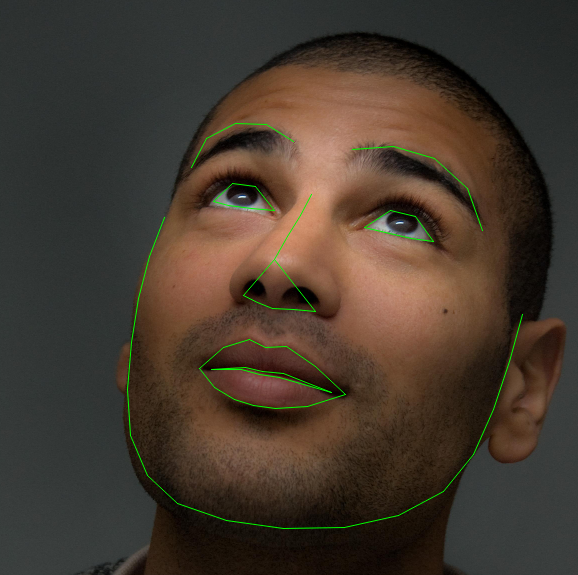
 
#### dataset [download here](https://download.pytorch.org/tutorial/faces.zip)


#### Learn more from actual tutorial [Pytorch Custom dataset](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [13]:
# some basic detail about dataset
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


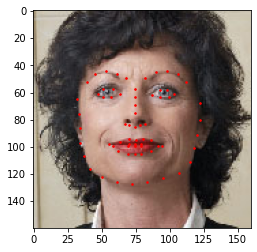

In [14]:
# a quick way to plot the points on the image
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(io.imread(os.path.join('faces/', img_name)),
               landmarks)
plt.show()

torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:

__len__ so that len(dataset) returns the size of the dataset.

__getitem__ to support the indexing such that dataset[i] can be used to get iith sample.

In [15]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations
            root_dir (string): Directory to all the image file
            transform (callable, optional): Option to transform to be applied on a sample
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
        
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
        
        img_name = os.path.join(self.root_dir,
                                 self.landmarks_frame.iloc[index, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[index,1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1,2)
        sample = {'image': image, 'landmarks': landmarks}
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    

0 (324, 215, 3) (68, 2)


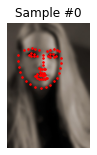

1 (500, 333, 3) (68, 2)


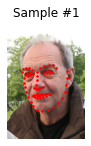

2 (250, 258, 3) (68, 2)


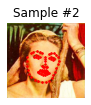

3 (434, 290, 3) (68, 2)


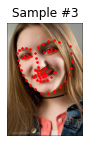

In [42]:
# let test our function

face_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv', root_dir ='faces/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]
    
    print(i, sample['image'].shape, sample['landmarks'].shape)
    
    ax = plt.subplot(1, 4, i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    
    if i ==3:
        plt.show()
        break

## 2.5 Pretrained model

In [16]:
# Dowload and load pretrained ResNet-18
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only top layer of the model, set as below
for param in resnet.parameters():
    param.requires_grad = False
    
# Replace the top layer for fineturing.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)

# Forward pass
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print(outputs.size())

torch.Size([64, 100])


## 2.6 Saving and loading of model/parameters

In [17]:
# Save and load the entire model.
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

In [18]:
# Save and load only the model parameters (recommended).
torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>

## 2.7 Create a simple MNIST Neural Network

This simple neural newtork will classify MNIST hand-written digits

In [19]:
# Download and prepare the dataset
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# initilise hyper-parameter
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


# MINST dataset
train_dataset = torchvision.datasets.MNIST(root='.',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='.',
                                           train=False,
                                           transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size, 
                                           shuffle=False)

torch.Size([28, 28]) , Label: 7


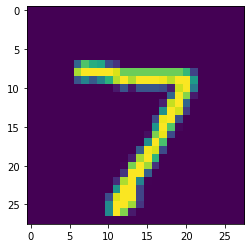

In [20]:
# printout the first number of test dataset

image, label = test_dataset[0]
# reduce batch=1 to no batch
image =image[0]
print("{} , Label: {}".format(image.size(), label))
plt.imshow(image)

we are going to create a Neural Network (multi-layer perceptron) The network has 2 layers, with ReLu activation in hidden layer

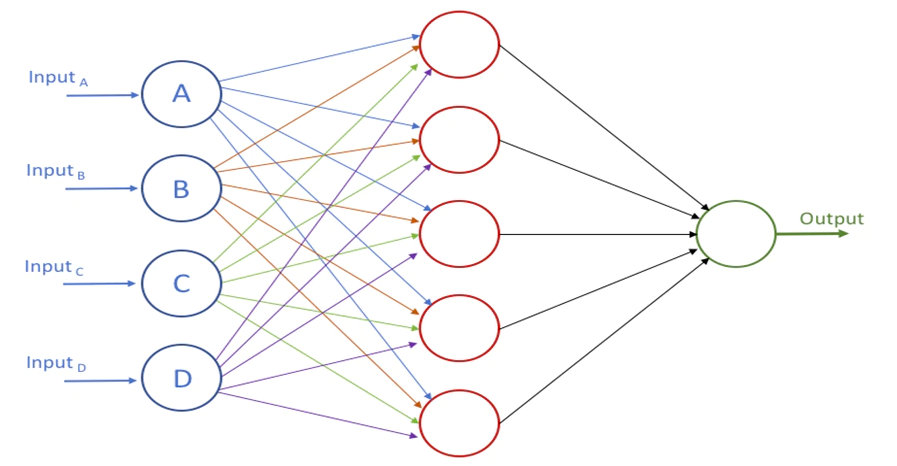

In [21]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [22]:
# Loss and optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
# Train the model
 
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
      
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                 .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.5488
Epoch [1/5], Step [200/600], Loss: 0.4019
Epoch [1/5], Step [300/600], Loss: 0.0933
Epoch [1/5], Step [400/600], Loss: 0.1462
Epoch [1/5], Step [500/600], Loss: 0.1352
Epoch [1/5], Step [600/600], Loss: 0.1059
Epoch [2/5], Step [100/600], Loss: 0.1524
Epoch [2/5], Step [200/600], Loss: 0.1057
Epoch [2/5], Step [300/600], Loss: 0.0540
Epoch [2/5], Step [400/600], Loss: 0.0766
Epoch [2/5], Step [500/600], Loss: 0.1700
Epoch [2/5], Step [600/600], Loss: 0.0460
Epoch [3/5], Step [100/600], Loss: 0.0484
Epoch [3/5], Step [200/600], Loss: 0.0472
Epoch [3/5], Step [300/600], Loss: 0.1504
Epoch [3/5], Step [400/600], Loss: 0.0681
Epoch [3/5], Step [500/600], Loss: 0.0636
Epoch [3/5], Step [600/600], Loss: 0.0621
Epoch [4/5], Step [100/600], Loss: 0.0444
Epoch [4/5], Step [200/600], Loss: 0.0399
Epoch [4/5], Step [300/600], Loss: 0.0554
Epoch [4/5], Step [400/600], Loss: 0.0363
Epoch [4/5], Step [500/600], Loss: 0.0317
Epoch [4/5], Step [600/600], Loss:

In [24]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

with torch.no_grad():
    correct = 0
    total = 0
    for images, lables in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        lables = lables.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += lables.size(0)
        correct += (predicted == lables).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# save the model checkpoint
torch.save(model.state_dict(), 'model.pt')

Accuracy of the network on the 10000 test images: 98.14 %


### Thanks for reading! 